In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
from skimage.feature import peak_local_max

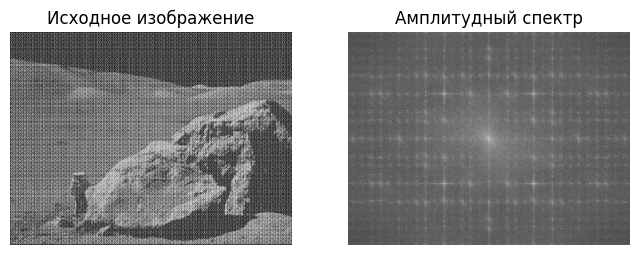

In [2]:
img = cv.imread('C:/ImageProcessing/labs/Fourier_Transform_Wavelets_Transform/periodic_noise.JPG', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Амплитудный спектр')
plt.axis('off')
plt.show()

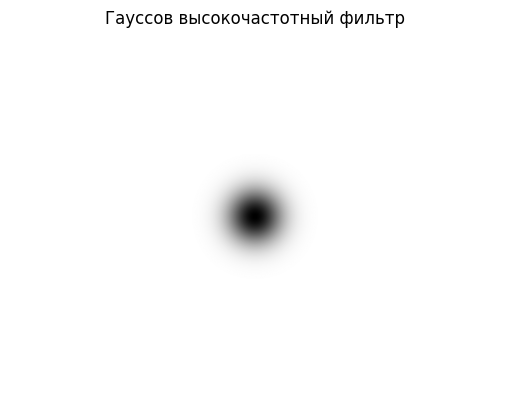

In [3]:
rows, cols = img.shape
centerX, centerY = int(rows / 2), int(cols / 2)
y, x = np.ogrid[:rows, :cols]
distance_sq = (x - centerY)**2 + (y - centerX)**2

sigma = 30
gaussian_high_pass = 1 - np.exp(-distance_sq / (2 * sigma**2))

mask = np.zeros((rows, cols, 2), np.float32)
mask[:,:,0] = gaussian_high_pass
mask[:,:,1] = gaussian_high_pass

# Визуализация фильтра
plt.imshow(mask[:,:,0], cmap='gray')
plt.title('Гауссов высокочастотный фильтр')
plt.axis('off')
plt.show()

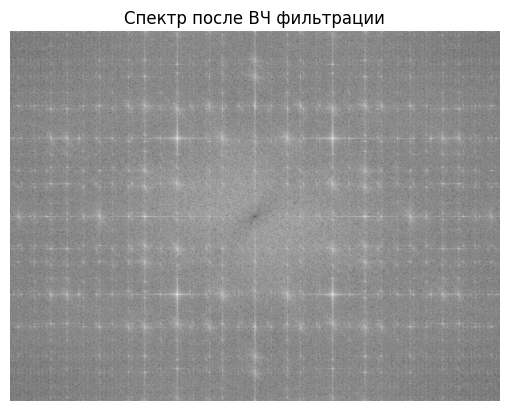

In [4]:
dft_shift_filtered = dft_shift * mask

filtering_magn_res = 20*np.log(cv.magnitude(dft_shift_filtered[:,:,0], dft_shift_filtered[:,:,1]) + 1)

plt.imshow(filtering_magn_res, cmap='gray')
plt.title('Спектр после ВЧ фильтрации')
plt.axis('off')
plt.show()

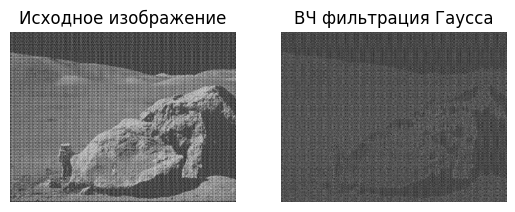

In [5]:
f_ishift = np.fft.ifftshift(dft_shift_filtered)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('ВЧ фильтрация Гаусса')
plt.axis('off')
plt.show()

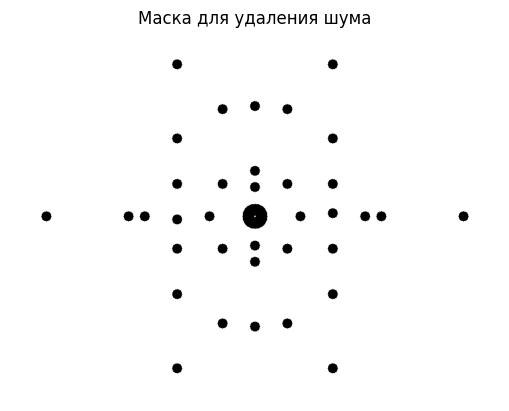

In [6]:
min_distance = 10
threshold_abs = 270
noise_coords = peak_local_max(magnitude_spectrum, min_distance=min_distance, threshold_abs=threshold_abs)

mask_noise = np.ones_like(dft_shift)
centerX, centerY = int(img.shape[0] / 2), int(img.shape[1] / 2)
radius = 8

for coord in noise_coords:
    cv.circle(mask_noise, (coord[1], coord[0]), radius, (0, 0), -1)

cv.circle(mask_noise, (centerY, centerX), radius + 12, (0, 0), -1)
inner_radius = max(radius - 12, 1)  # минимум 1 пиксель
cv.circle(mask_noise, (centerY, centerX), inner_radius, (1, 1), -1)

# Визуализация маски
plt.imshow(mask_noise[:,:,0], cmap='gray')
plt.title('Маска для удаления шума')
plt.axis('off')
plt.show()

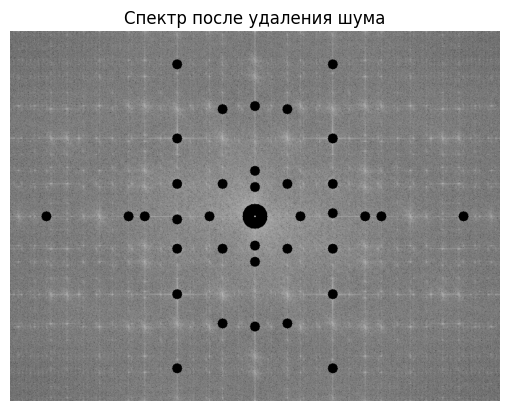

In [7]:
# Применяем фильтр
dft_shift_noise_removed = dft_shift * mask_noise

# Визуализация отфильтрованного спектра
filtered_spectrum = 20*np.log(cv.magnitude(dft_shift_noise_removed[:,:,0], dft_shift_noise_removed[:,:,1]) + 1)

plt.imshow(filtered_spectrum, cmap='gray')
plt.title('Спектр после удаления шума')
plt.axis('off')
plt.show()

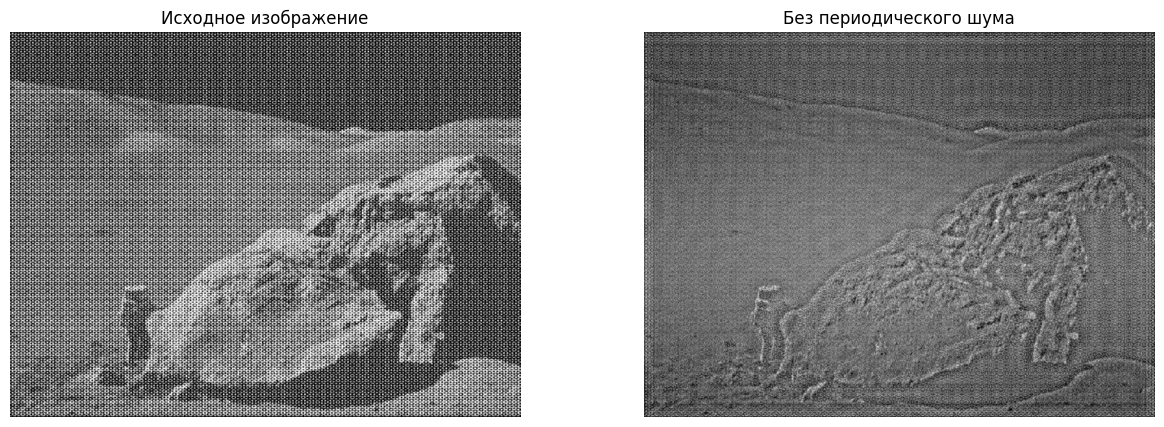

In [8]:
# Обратное преобразование
f_ishift_noise_removed = np.fft.ifftshift(dft_shift_noise_removed)
img_back_noise_removed = cv.idft(f_ishift_noise_removed)
img_back_noise_removed = cv.magnitude(img_back_noise_removed[:,:,0], img_back_noise_removed[:,:,1])

# Нормализация
img_back_noise_removed = cv.normalize(img_back_noise_removed, None, 0, 255, cv.NORM_MINMAX)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back_noise_removed, cmap='gray')
plt.title('Без периодического шума')
plt.axis('off')

plt.show()